In [36]:
""""
Figaro times collection times script.
"""
import csv
import numpy as np
import pandas as pd
import argparse
import os
from openpyxl import load_workbook
from openpyxl.utils.cell import get_column_letter
import logging
import argparse
import sys
import numpy as np
import matplotlib.pyplot as plt


def collect_times(ohe: bool, root_path: str, exp_names: list, db_names: list,
     exp_paths: dict, join_orders: dict, start_per: int, end_per: int,
         per_inc: int, num_measurement: int):
    XLSX_NAME = "time.xlsx"
    df_measurement_exps = {}
    for exp_name in exp_names:
        exp_path = exp_paths[exp_name]
        perf_path = os.path.join(root_path, exp_path)
        df_measurement = pd.DataFrame(columns=db_names)

        for db_name in db_names:
            for db_idx, percent in enumerate(range(start_per, end_per + 1, per_inc)):
                if not ohe:
                    db_name_per = "{}{}".format(db_name, percent)
                else:
                    db_name_per = "{}PK1C{}".format(db_name, percent)
                join_order = join_orders[db_name]
                path_xlsx = os.path.join(perf_path, db_name_per, join_order, XLSX_NAME)
                workbook = load_workbook(filename=path_xlsx, data_only=True)
                sheet = workbook.active
                row_count = sheet.max_row
                col_idx = db_idx + 1
                col_letter = get_column_letter(col_idx)

                start_row_idx = 2 if exp_name == "mkl" else 14
                np_measures = np.zeros(num_measurement)
                for row_idx_dst in range(start_row_idx, start_row_idx + num_measurement):
                    print(row_idx_dst)
                    offset_idx = row_idx_dst - start_row_idx
                    #row_idx_src = row_count - num_measurement  + offset_idx
                    row_idx_src = row_idx_dst
                    print(row_idx_src)
                    val = sheet.cell(row=row_idx_src, column=2).value
                    print(val)
                    np_measures[offset_idx] = float(val)
                print(percent, np_measures)
                time_avg = np.mean(np_measures[1:])
                df_measurement.at[percent, db_name] = time_avg

            df_measurement.index = df_measurement.index.set_names(['index'])
            df_measurement = df_measurement.astype(float)
        df_measurement_exps[exp_name] = df_measurement

    return df_measurement_exps


def dump_results_to_dat(ohe: bool, db_names: list, df_measurement_exps: dict):
    db_name_map = {
    "DBFavorita": "exp1perf-favorita.dat",
    "DBRetailer": "exp1perf-retailer.dat",
    "DBYelp": "exp1perf-yelp.dat"
    }
    exp_dat_names = ["#percentage of data", "figaro-time", "mkl-time"]
    exp_to_show = ["figaro_thin", "mkl",]

    for db_name in db_names:
        dbs_results = []
        for exp_name in exp_to_show:
            dbs_results.append(df_measurement_exps[exp_name][db_name])
        df_db_results = pd.concat(dbs_results, axis=1)
        df_db_results = df_db_results.reset_index().rename(columns={df_db_results.index.name:'index'})
        df_db_results.columns = exp_dat_names
        dir_out_root = "results"
        dir_out = "ohe" if ohe else "non-ohe"
        dir_out = os.path.join(dir_out_root, dir_out)
        os.makedirs(dir_out, exist_ok=True)
        out_name = os.path.join(dir_out, db_name_map[db_name])
        print(out_name)
        df_db_results.to_csv(out_name, float_format='%.2f', sep='\t', index=False, quoting=csv.QUOTE_NONE,  escapechar=" ")

def plot_performance(ohe: bool, exp_names: list,
        df_measurement_exps: dict):
    plt.figure("name", figsize=(16, 8), dpi=80)
    plt.xlabel("Percentage of input matrix")
    plt.ylabel("wall-clock-time[s]")

    plt.title("Runtime performance comparison of Figaro and competitors on real-world datasets")

    plt.yscale('linear')
    plt.locator_params(axis='x', nbins=6)
    plt.locator_params(axis='x', nbins=10)
    db_marker =  {"DBFavorita": "^", "DBYelp": "s", "DBRetailer": "x"}
    exp_colour = {"figaro_thin": "r", "mkl": "b"
    }

    for exp_name in exp_names:
        df_measurement = df_measurement_exps[exp_name]
        for db_name in df_measurement:
            plt.plot(df_measurement[db_name], "-" + exp_colour[exp_name] + db_marker[db_name], label="{} {}".format(exp_name, db_name), markersize=8)
    plt.legend(loc="upper left")

    plt.show()
    dir_out_root = "results"
    dir_out = "ohe" if ohe else "non-ohe"
    dir_out = os.path.join(dir_out_root, dir_out)
    os.makedirs(dir_out, exist_ok=True)
    out_path = os.path.join(dir_out, "performance_percent.png")
    plt.savefig(out_path)


14
14
1.14911
15
15
1.261232
16
16
1.181179
17
17
1.280936
18
18
1.246578
10 [1.14911  1.261232 1.181179 1.280936 1.246578]
14
14
2.262797
15
15
2.251831
16
16
2.270412
17
17
2.251098
18
18
2.208625
20 [2.262797 2.251831 2.270412 2.251098 2.208625]
14
14
3.293133
15
15
3.453875
16
16
3.617916
17
17
3.73373
18
18
3.389041
30 [3.293133 3.453875 3.617916 3.73373  3.389041]
14
14
4.391551
15
15
4.552329
16
16
4.563184
17
17
4.872498
18
18
4.462744
40 [4.391551 4.552329 4.563184 4.872498 4.462744]
14
14
5.37088
15
15
5.375787
16
16
5.488532
17
17
5.418689
18
18
5.57262
50 [5.37088  5.375787 5.488532 5.418689 5.57262 ]
14
14
6.975391
15
15
6.921132
16
16
6.783054
17
17
6.88902
18
18
6.500269
60 [6.975391 6.921132 6.783054 6.88902  6.500269]
14
14
7.674015
15
15
7.459239
16
16
8.702819
17
17
7.601646
18
18
7.738385
70 [7.674015 7.459239 8.702819 7.601646 7.738385]
14
14
9.001296
15
15
9.236484
16
16
9.353819
17
17
9.076061
18
18
9.124383
80 [9.001296 9.236484 9.353819 9.076061 9.124383]
14
14

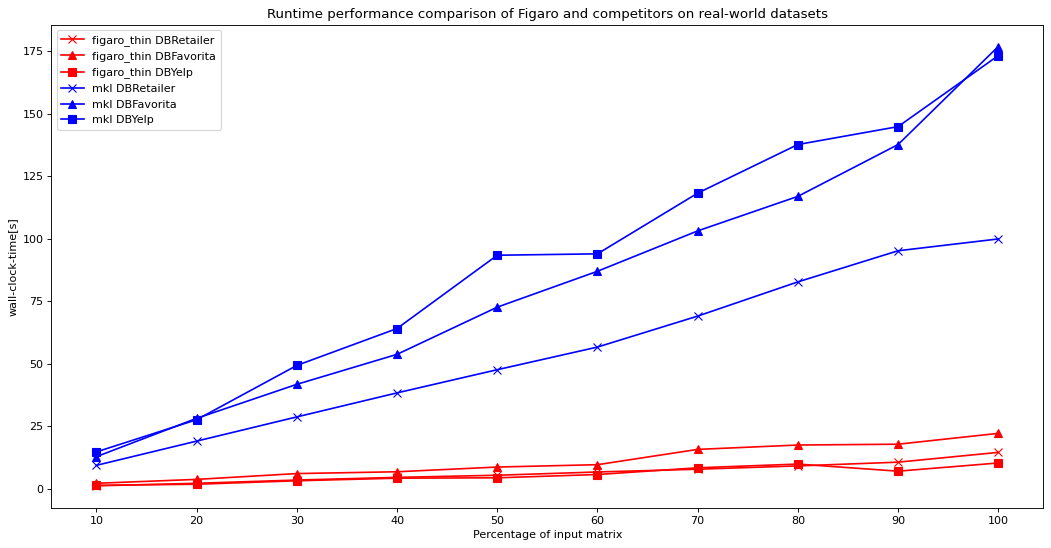

<Figure size 432x288 with 0 Axes>

In [37]:

root_path = "/local/scratch/Figaro/tests_path/figaro-code"
ohe = False
exp_names = ["figaro_thin",  "mkl"]
dump_results = True

exp_paths = {"figaro_thin": "comparisons/performance/figaro/svd/lapack/thread48", "mkl": "comparisons/performance/decomp_alg/svd/jacobi/col_major/u_and_s_and_v"}

db_names = ["DBRetailer", "DBFavorita", "DBYelp"]
if ohe:
    join_orders = {"DBRetailer": "ItemRoot",
    "DBFavorita": "ItemsRoot", "DBYelp": "UserRoot"}
else:
    join_orders = {"DBRetailer": "LocationRoot",
        "DBFavorita": "StoresRoot", "DBYelp": "BusinessRoot"}

start_per = 10
end_per = 100
per_inc = 10

num_measurement = 5

df_measurement_exps = collect_times(ohe, root_path, exp_names, db_names,
    exp_paths, join_orders, start_per, end_per, per_inc,
    num_measurement)

if dump_results:
    dump_results_to_dat(ohe, db_names, df_measurement_exps)
plot_performance(ohe, exp_names, df_measurement_exps)